>Problem 1
>Remember from last week we discussed that skewness and kurtosis functions in statistical packages are often biased. Is your function biased? Prove or disprove your hypothesis.


In [73]:
# data = np.random.normal(0, 1, 1000)  # Example data (normal distribution)

# print(data)

In [90]:
import numpy as np
from scipy.stats import kurtosis, norm

# Step 1: Sample 100,000 standardized random normal values
sample_size = 100000
data = np.random.normal(0, 1, sample_size)

# Step 2: Calculate the kurtosis
observed_kurtosis = kurtosis(data)

# Step 3: Sample the kurtosis by repeating steps 1 and 2 (100) times
num_samples = 100
sampled_kurtosis = np.zeros(num_samples)

for i in range(num_samples):
    sampled_data = np.random.normal(0, 1, sample_size)
    sampled_kurtosis[i] = kurtosis(sampled_data)

#print(sampled_kurtosis)

# Step 4: Calculate the mean kurtosis 𝑘 and standard deviation
mean_sampled_kurtosis = np.mean(sampled_kurtosis)
std_dev_sampled_kurtosis = np.std(sampled_kurtosis)

# Step 5: Calculate the T statistic (μ0 = 0)
T = (mean_sampled_kurtosis - 0) / (std_dev_sampled_kurtosis / np.sqrt(num_samples))

# Step 6: Use the CDF function to find the p-value
p_value = 2 * (1 - norm.cdf(abs(T)))

# Step 7: If the p-value is lower than your threshold (typically 5%), then reject the hypothesis
threshold = 0.05
if p_value < threshold:
    print(f"Rejected the hypothesis and the kurtosis function is unbiased (p-value = {p_value})")
else:
    print(f"Failed to reject the hypothesis and kurtosis function is biased (p-value = {p_value})")


Failed to reject the hypothesis and kurtosis function is biased (p-value = 0.16740819247694438)


>Trying the alternative method using t-test function from the package

In [91]:
from scipy.stats import ttest_1samp

# Step 4: Calculate the mean kurtosis 𝑘
mean_sampled_kurtosis = np.mean(sampled_kurtosis)

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(sampled_kurtosis, popmean=0)

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

t-statistic: -1.3736595741584392
P-value: 0.17264998026793738


>The t- test function from the package does not change the p-value significantly from what calcuated using the formula(changes in the 3rd decimal place). The p-value is still less than 0.05, so we fail to reject the null hypothesis and conclude that the kurtosis is biased.

### Problem 2 ###

Fit the data in problem2.csv using OLS and calculate the error vector. Look at its distribution. How well does it fit the assumption of normally distributed errors?

Fit the data using MLE given the assumption of normality. Then fit the MLE using the assumption of a T distribution of the errors. Which is the best fit?

What are the fitted parameters of each and how do they compare? What does this tell us about the breaking of the normality assumption in regards to expected values in this case?


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# df = pd.read_csv('/Users/ahmedibrahim/Desktop/Mids/Fall 24/Quantitative Risk Management/FinTech545_Fall2023/Week02/Project/problem2.csv')

df = pd.read_csv('https://raw.githubusercontent.com/ibrahimjuhas/FinTech545_Fall2023_Ibrahim/main/Week02_answers/problem2.csv')

print(df.head())

df.shape



          x         y
0 -1.614399 -1.695691
1 -0.900999  0.409843
2 -0.170662  1.043979
3  2.097252  2.708814
4  0.140208  0.052374


(100, 2)

In [111]:
type(df[['x']])

pandas.core.frame.DataFrame

In [112]:

# Define the dependent variable (Y) and independent variable (X)
Y = df['y']
X = df[['x']]

# Add a constant term to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(Y, X).fit()

# Display the regression summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     23.68
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           4.34e-06
Time:                        03:21:56   Log-Likelihood:                -159.99
No. Observations:                 100   AIC:                             324.0
Df Residuals:                      98   BIC:                             329.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1198      0.121      0.990      0.3

In [113]:
# Get the predicted values
predicted_values = ols_model.predict()

# Calculate the error vector
error_vector = Y - predicted_values


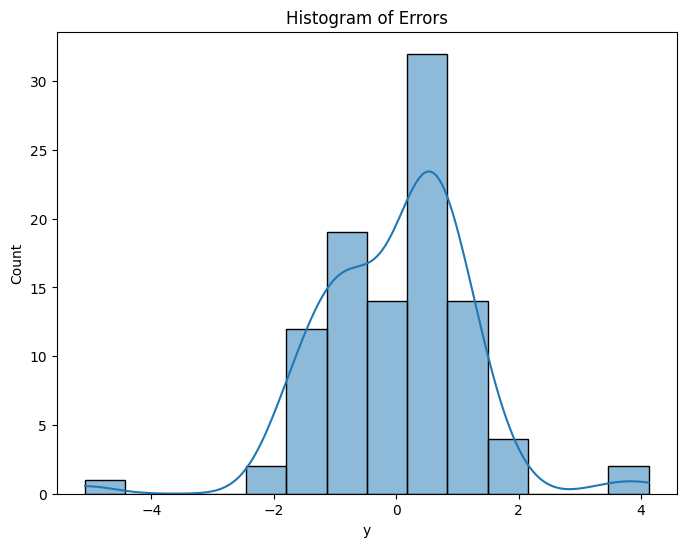

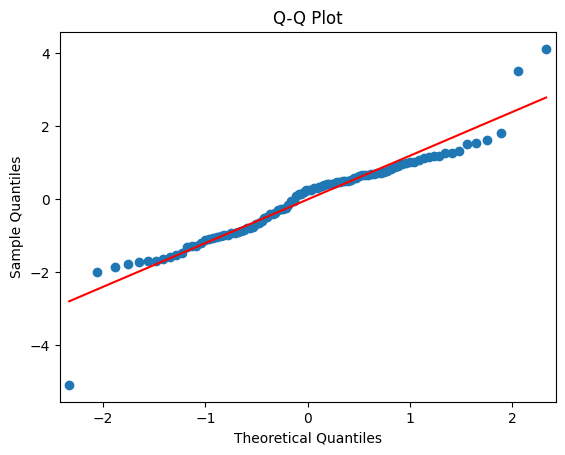

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of errors
plt.figure(figsize=(8, 6))
sns.histplot(error_vector, kde=True)
plt.title('Histogram of Errors')
plt.show()

# Generate Q-Q plot
sm.qqplot(error_vector, line='s')
plt.title('Q-Q Plot')
plt.show()


How well does it fit the assumption of normally distributed errors?

THe histogram and Q-Q plot of the error vector depicts how the error vector is normally distributed. The histogram here does have a somewhat bell shape however it is not normally distributed in the center and is skewed to the right. Similarly, the Q-Q plot above checks for the assumption of normality if the points closely follow the diagonal line. The points here somewhat follow the diagonal line confiming the errors are not normally distributed.

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 17081.55163429948
        x: [ 2.246e-02  8.863e+01  1.335e+00]
      nit: 85
      jac: [-2.315e+01 -6.548e-03 -6.148e-02]
     nfev: 488
     njev: 122
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


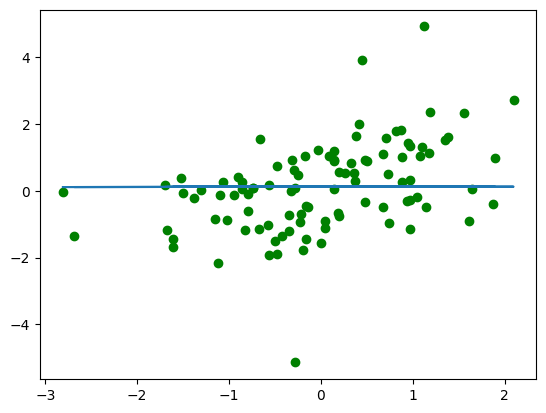

MLE Estimate for Intercept (beta0): 0.02246111787974192
MLE Estimate for Slope (beta1): 88.63005235734333
MLE Estimate for Standard Deviation (sigma): 1.3353755226441624


In [3]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
import pylab as py

# ydata = np.array([0.1,0.15,0.2,0.3,0.7,0.8,0.9, 0.9, 0.95])
# xdata = np.array(range(0,len(ydata),1))

df2 = pd.read_csv('https://raw.githubusercontent.com/ibrahimjuhas/FinTech545_Fall2023_Ibrahim/main/Week02_answers/problem2.csv')

Y = df2['y']
X = df2[['x']]


def loglikelihood(params):
    k = params[0]
    x0 = params[1]   
    sd = params[2]

    yPred = 1 / (1+ np.exp(-k*(X-x0)))

    # Calculate negative log likelihood
    LL = -np.sum( stats.norm.logpdf(Y, loc=yPred, scale=sd ) )

    return(LL)


initParams = [1, 1, 1]

results = minimize(loglikelihood, initParams, method='L-BFGS-B')
# print(results.x)
print(results)

estParms = results.x
yOut = yPred = 1 / (1+ np.exp(-estParms[0]*(X-estParms[1])))

py.clf()
py.plot(X,Y, 'go')
py.plot(X, yOut)
py.show()


intercept_mle, slope_mle, sigma_mle = results.x

print(f"MLE Estimate for Intercept (beta0): {intercept_mle}")
print(f"MLE Estimate for Slope (beta1): {slope_mle}")
print(f"MLE Estimate for Standard Deviation (sigma): {sigma_mle}")

>Fitting the data using MLE given the assumption of T distribution of errors

In [4]:
import numpy as np
from scipy.optimize import minimize


df2 = pd.read_csv('https://raw.githubusercontent.com/ibrahimjuhas/FinTech545_Fall2023_Ibrahim/main/Week02_answers/problem2.csv')

Y = df2['y']
X = df2[['x']]


def LR_likelihood_t(params):
    beta0, beta1, sigma, nu = params
    residuals = Y - (beta0 + beta1 * X)
    likelihood = np.prod((1 / (sigma * np.sqrt(np.pi * nu))) * (1 + (1 / nu) * ((residuals / sigma)**2))**(-(nu + 1) / 2))
    return -np.log(likelihood).sum()

# print(Y)

initial_guess_t = [2, 3, 1, 4]


result_t = minimize(LR_likelihood_t, initial_guess_t, method='L-BFGS-B')
print(result_t)


intercept_mle_t, slope_mle_t, sigma_mle_t, nu_mle_t = result_t.x

print(f"MLE Estimate for Intercept (beta0): {intercept_mle_t}")
print(f"MLE Estimate for Slope (beta1): {slope_mle_t}")
print(f"MLE Estimate for Standard Deviation (sigma): {sigma_mle_t}")
print(f"MLE Estimate for Degrees of Freedom (nu): {nu_mle_t}")


  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -0.0
        x: [ 2.000e+00  3.000e+00  1.000e+00  4.000e+00]
      nit: 0
      jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
     nfev: 5
     njev: 1
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
MLE Estimate for Intercept (beta0): 2.0
MLE Estimate for Slope (beta1): 3.0
MLE Estimate for Standard Deviation (sigma): 1.0
MLE Estimate for Degrees of Freedom (nu): 4.0


Problem 3

Simulate AR(1) through AR(3) and MA(1) through MA(3) processes. Compare their ACF and PACF graphs. How do the graphs help us to identify the type and order of each process?

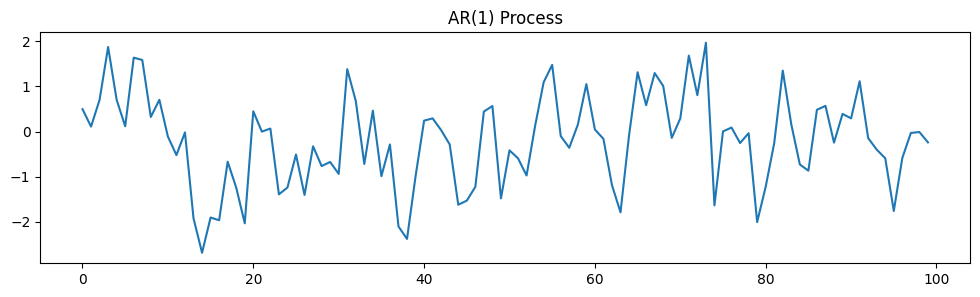

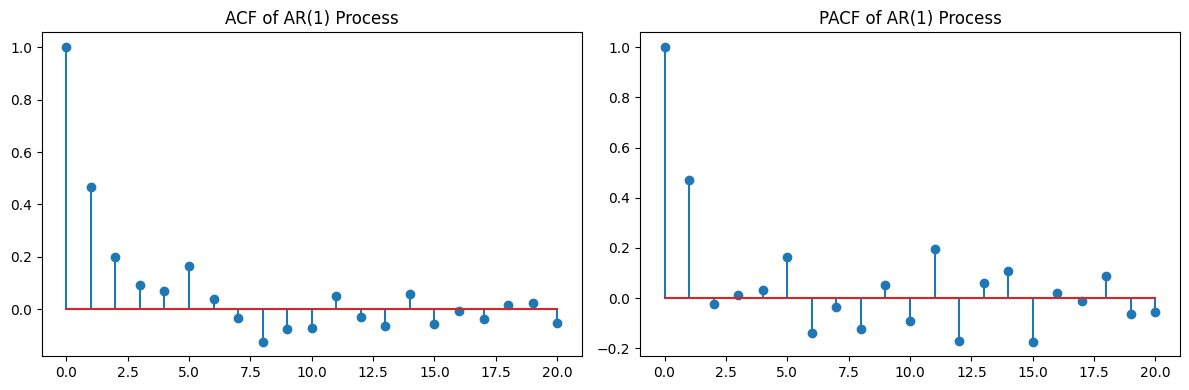

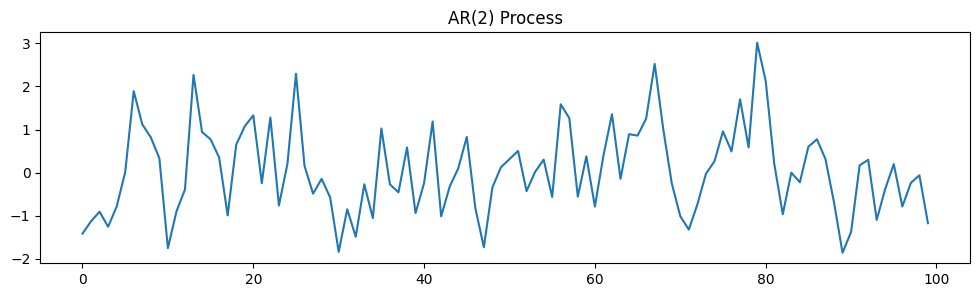

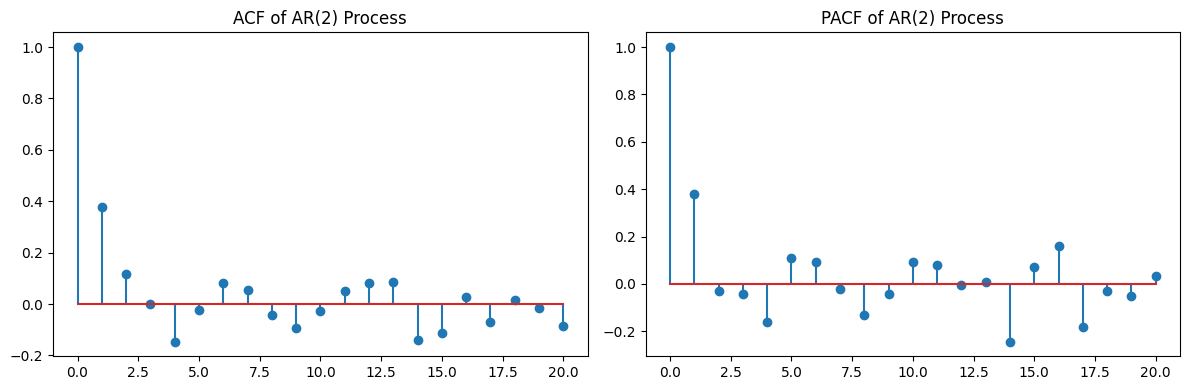

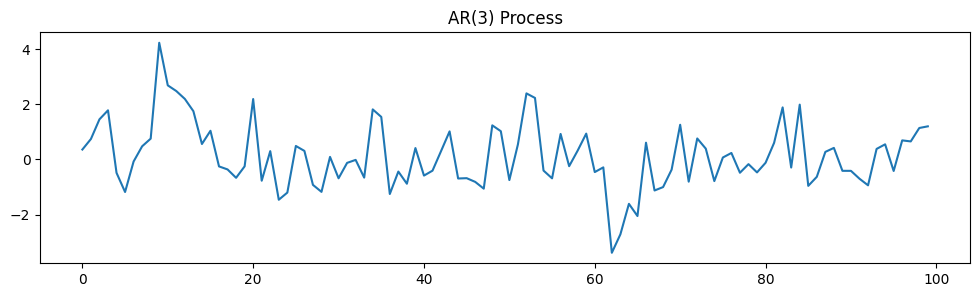

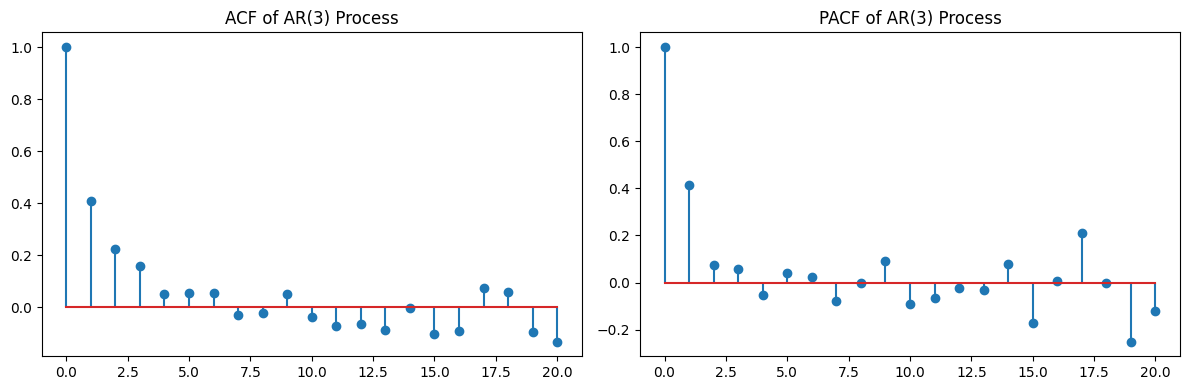

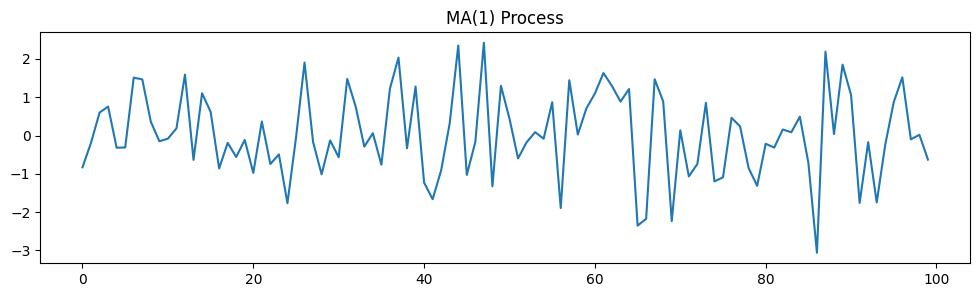

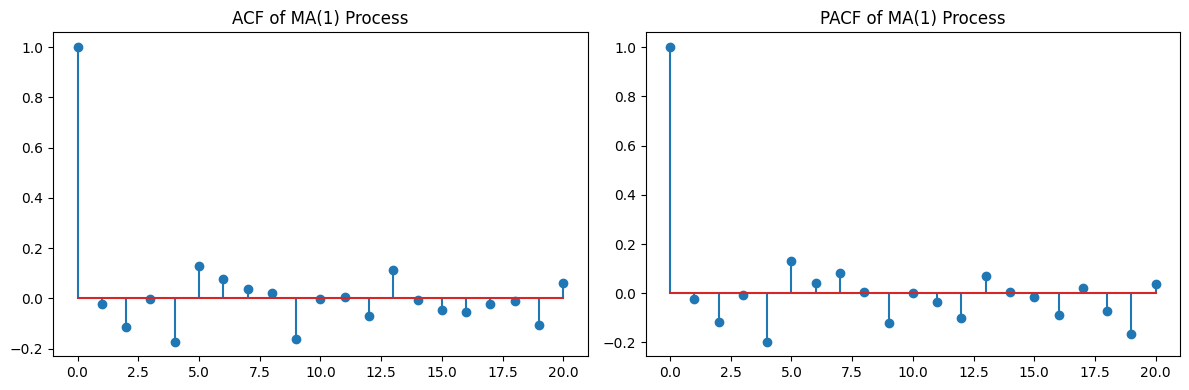

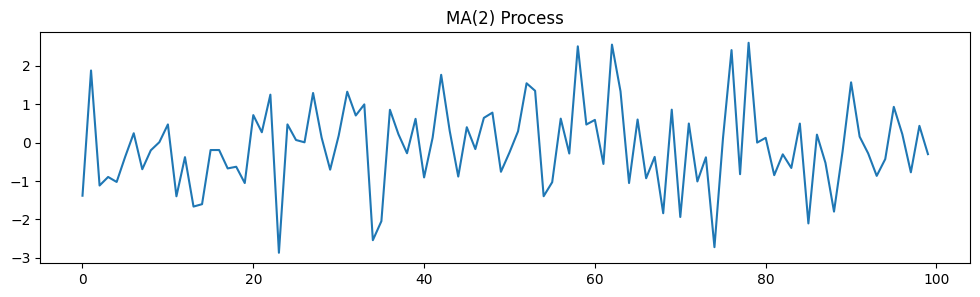

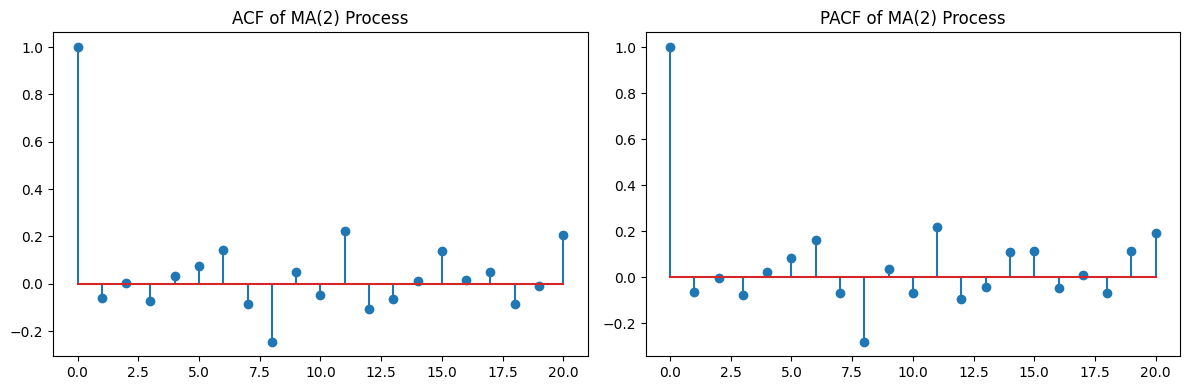

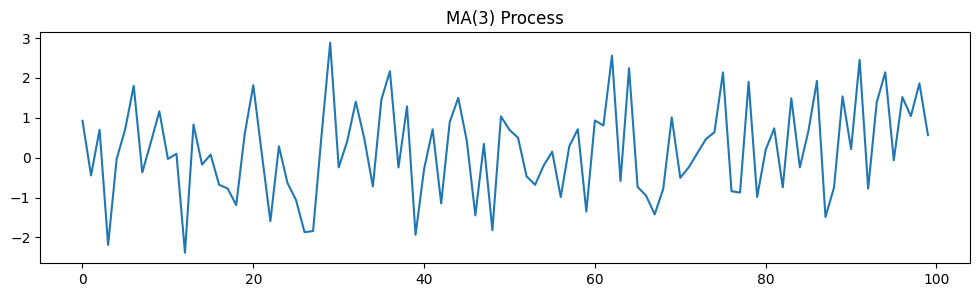

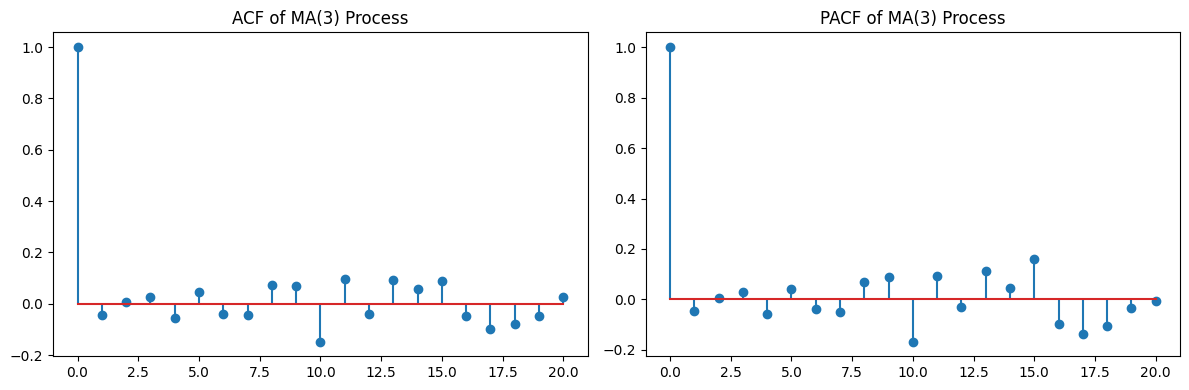

In [213]:

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf


np.random.seed(42)
n = 100  # time steps

# define AR simulation function
def simulate_AR(p, phi):
    ar_process = [np.random.normal(0, 1)]
    for i in range(1, n):
        ar_process.append(phi * ar_process[i-1] + np.random.normal(0, 1))
    return np.array(ar_process)

# define MA simulation function
def simulate_MA(q, theta):
    ma_process = [np.random.normal(0, 1)]
    for i in range(1, n):
        ma_process.append(np.random.normal(0, 1) + theta * np.random.normal(0, 1))
    return np.array(ma_process)

# Plot AR processes
for p in range(1, 4):
    phi = 0.5  
    ar_process = simulate_AR(p, phi)
    
    plt.figure(figsize=(12, 3))
    plt.plot(ar_process)
    plt.title(f'AR({p}) Process')
    plt.show()
    
    # Calculate ACF and PACF
    acf_values = acf(ar_process, nlags=20)
    pacf_values = pacf(ar_process, nlags=20)
    
    # Plot ACF and PACF
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.stem(acf_values)
    plt.title(f'ACF of AR({p}) Process')
    
    plt.subplot(1, 2, 2)
    plt.stem(pacf_values)
    plt.title(f'PACF of AR({p}) Process')
    
    plt.tight_layout()
    plt.show()

# Simulate and plot MA processes
for q in range(1, 4):
    theta = 0.5  
    ma_process = simulate_MA(q, theta)
    
    plt.figure(figsize=(12, 3))
    plt.plot(ma_process)
    plt.title(f'MA({q}) Process')
    plt.show()
    
    # Calculate ACF and PACF
    acf_values = acf(ma_process, nlags=20)
    pacf_values = pacf(ma_process, nlags=20)
    
    # Plot ACF and PACF
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.stem(acf_values)
    plt.title(f'ACF of MA({q}) Process')
    
    plt.subplot(1, 2, 2)
    plt.stem(pacf_values)
    plt.title(f'PACF of MA({q}) Process')
    
    plt.tight_layout()
    plt.show()
